In [8]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.decomposition import PCA

### Iris 데이터의 1차원 축소(10송이 대상, 2 feature -> 1 feature, 1가지 잠재변수 차원으로 축소)

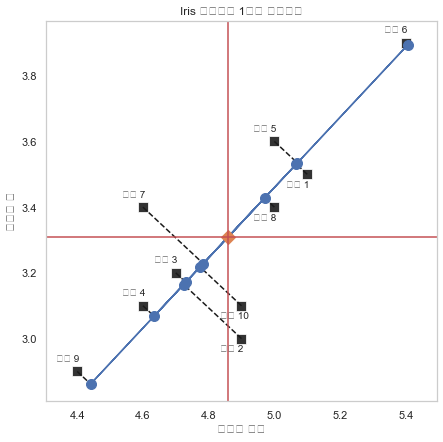

In [20]:
from sklearn.decomposition import PCA

iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

### Iris 데이터의 1차원 축소(10송이 대상, 4feature -> 1feature, 4차원 -> 1차원으로 축소)

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :4]  # 꽃받침 길이와 꽃받침 폭만 선택

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

### 1) PCA 의 기준점 = 평균벡터

In [11]:
pca1.mean_

array([4.86, 3.31, 1.45, 0.22])

### 2) PCA 로 얻은 주성분 벡터

In [12]:
pca1.components_

array([[0.66811102, 0.71663448, 0.16441128, 0.11415614]])

### 3) 특이값분해로 얻은 우특이벡터 확인

In [13]:
X0 = X- X.mean(axis=0)
U, S, VT = np.linalg.svd(X0)
VT

array([[-0.66811102, -0.71663448, -0.16441128, -0.11415614],
       [ 0.70647649, -0.64270361,  0.11898477, -0.27141419],
       [-0.1402659 , -0.13565029,  0.91363679,  0.35664028],
       [-0.18666579,  0.23444848,  0.35224902, -0.88662868]])

### 4) 분산행렬 구성 -> 고유값분해 -> 고유벡터 정렬(고유값 내림차순 기준)

In [14]:
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV) ### 3) 특이값분해로 얻은 우특이벡터 확인lg.eig(XCOV)
V[:,np.argmax(W)]

array([0.66811102, 0.71663448, 0.16441128, 0.11415614])

### 5) 기존 데이터와 투영 데이터의 비교

In [15]:
X[7,:]

array([5. , 3.4, 1.5, 0.2])

In [16]:
X_low[7]

array([0.16397009])

In [17]:
pca1.components_ @ (X[7,:] - pca1.mean_)

array([0.16397009])

### 6) 투영 데이터와 복원 데이터(역변환행렬 대입) 비교

In [18]:
X[7,:]

array([5. , 3.4, 1.5, 0.2])

In [19]:
X2[7,:]

array([4.96955022, 3.42750662, 1.47695853, 0.23871819])